adp 라이브러리 패키지 설치하기
```bash
%chmod +x ./requirements.sh
./requirements.sh
```

matplotlib 한글 설정하기

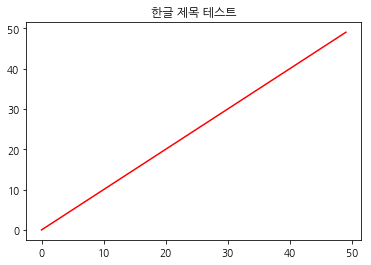

In [3]:
class font_setting():
    def __init__(self):
        self.font_url = "https://github.com/google/fonts/blob/main/ofl/nanumgothic/NanumGothic-Regular.ttf?raw=true"
        self.path = "./NanumGothic-Regular.ttf"
        
    def get_font(self):
        import requests
        from matplotlib import font_manager, rc
        import matplotlib.pyplot as plt
        
        res = requests.get(self.font_url)
        
        with open(self.path, "wb") as font_file:
            font_file.write(res.content)
        
        font_manager.fontManager.ttflist += font_manager.createFontList([self.path])
        rc('font', family='NanumGothic')
        plt.rcParams["font.family"] = 'NanumGothic'
    
    def delete_font(self):
        import os
        os.remove(self.path)

font_set = font_setting()
font_set.get_font()

import matplotlib.pyplot as plt

# 한글 텍스트를 사용해 플롯 생성
plt.plot(range(50), range(50), 'r')
plt.title('한글 제목 테스트')
plt.show()

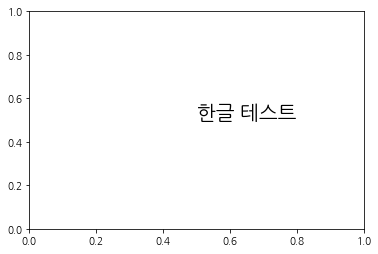

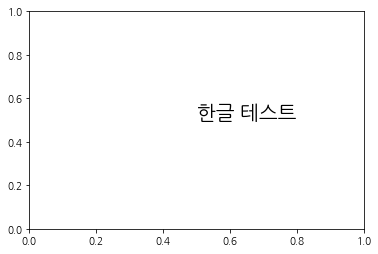

In [5]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import tempfile

# 폰트 URL
font_url = "https://github.com/google/fonts/blob/main/ofl/nanumgothic/NanumGothic-Regular.ttf?raw=true"
response = requests.get(font_url)

# 임시 파일에 폰트를 저장
with tempfile.NamedTemporaryFile(delete=True) as fp:
    fp.write(response.content)
    fp.flush()

    # FontProperties 객체를 생성
    font_prop = fm.FontProperties(fname=fp.name)

    # 텍스트 요소에 FontProperties 객체를 적용
    plt.text(0.5, 0.5, '한글 테스트', fontproperties=font_prop, size=20)
    plt.show()

########## 동일한 코드 ################

# 임시 파일 생성
fp = tempfile.NamedTemporaryFile(delete=False)

# 폰트 데이터를 파일에 쓰기
fp.write(response.content)
fp.close()

# 여기서 파일을 사용할 수 있습니다.

# 파일의 경로로 FontProperties 객체를 생성
font_prop = fm.FontProperties(fname=fp.name)

# 텍스트 요소에 FontProperties 객체를 적용
plt.text(0.5, 0.5, '한글 테스트', fontproperties=font_prop, size=20)
plt.show()

# 임시 파일 삭제
os.remove(fp.name)